In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

# Step 1: Mount your Google Drive
drive.mount('/content/drive')

# Step 2: Load your dataset
df = pd.read_csv('/content/drive/My Drive/zomato.csv')
df.head()

Mounted at /content/drive


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# **1. Data Cleaning**

1.1 Inspect the Dataset


In [ ]:
# Check first 5 rows
print(df.head())

# Check shape (rows, columns)
print("Shape:", df.shape)

# Overview of columns, datatypes, missing values
print(df.info())

# Quick stats for numerical columns
print(df.describe())


                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [ ]:
# Count missing values in each column
print(df.isnull().sum())

# Check for duplicate rows
print("Duplicates:", df.duplicated().sum())

# Drop irrelevant columns
df = df.drop(['url', 'address', 'phone', 'reviews_list', 'menu_item', 'dish_liked'], axis=1)

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64
Duplicates: 0


1.3 Dropping the duplicates

In [ ]:
df = df.drop_duplicates()
print("Duplicates after drop:", df.duplicated().sum())


Duplicates after drop: 0




**1.4 Handling Missing Rating**

We observed that about 10,000 rows (~19%) have missing values in the `rate` column.  
These correspond to restaurants that are either **new** or **not yet rated**.  

Since our analysis is focused on **trends in ratings, cuisines, and costs**, keeping unrated restaurants would not provide useful insights.  
Therefore, we will drop rows where `rate` is missing, leaving us with only rated restaurants for analysis.  
This still leaves us with over 40,000 records, which is sufficient for meaningful EDA.






In [ ]:
# Check the current data type of 'rate'
print(df['rate'].dtype)

# Since 'rate' is already float, no splitting is needed; use a simpler approach
# If there are still string values like '3.5/5' or 'NEW', filter them first
def clean_rate(rate):
    if pd.isna(rate) or rate == 'NEW' or rate == '-':
        return np.nan
    else:
        try:
            return float(rate)  # Convert to float if not already
        except (ValueError, TypeError):
            return np.nan  # Handle any unexpected formats

# Apply the cleaning function only if needed (optional re-run)
df['rate'] = df['rate'].apply(clean_rate)

# Drop any new NaN values introduced
df = df.dropna(subset=['rate'])

# Final check
print(df['rate'].describe())



float64
count    41590.000000
mean         3.700142
std          0.440451
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64


In [ ]:
# 2. Fill tiny missing values with 'Unknown'
df['location'] = df['location'].fillna('Unknown')
df['rest_type'] = df['rest_type'].fillna('Unknown')
df['cuisines'] = df['cuisines'].fillna('Unknown')

# Final check
print(df.isnull().sum())
print("New shape:", df.shape)


name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    245
listed_in(type)                  0
listed_in(city)                  0
dtype: int64
New shape: (41590, 11)




1.5 Cleaning `approx_cost(for two people)`

The column contained values like "1,200" stored as strings with commas,  
and some rows already had numeric values.  

Steps taken:
1. Converted everything to string to avoid `.str` errors.  
2. Removed commas (e.g., "1,200" → "1200").  
3. Converted column to numeric (floats).  
4. Filled missing values with the median cost.  




In [ ]:
# Ensure column is string before using .str
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# Remove commas
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

# Convert to float (invalid values like 'nan' will become NaN)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Fill missing values with median
median_cost = df['approx_cost(for two people)'].median()
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_cost)




 1.6 Standardizing Categorical Columns

The dataset contained categorical columns like `online_order`, `book_table`,
`rest_type`, `cuisines`, and `location` with inconsistent formatting
(extra spaces, mixed case).

To ensure consistency:
- Converted `online_order` and `book_table` to only have `Yes` / `No`.
- Stripped extra spaces and applied title case to `rest_type`, `cuisines`, and `location`.

This step avoids treating the same category as different values
(e.g., "casual dining" vs "Casual Dining").




In [ ]:
# 1. Standardize Yes/No columns
df['online_order'] = df['online_order'].str.strip().str.title()
df['book_table'] = df['book_table'].str.strip().str.title()

# 2. Standardize text fields (remove extra spaces, make consistent title case)
df['rest_type'] = df['rest_type'].str.strip().str.title()
df['cuisines'] = df['cuisines'].str.strip().str.title()
df['location'] = df['location'].str.strip().str.title()

#  Final check for unique values
print("Unique Online Order values:", df['online_order'].unique())
print("Unique Book Table values:", df['book_table'].unique())
print("Unique Rest Types (sample):", df['rest_type'].unique()[:10])

Unique Online Order values: ['Yes' 'No']
Unique Book Table values: ['Yes' 'No']
Unique Rest Types (sample): ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor']


In [ ]:
# Final check after cleaning

# Show first 5 rows
display(df.head())

# Check shape
print("Final Shape:", df.shape)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Final Shape: (41590, 11)

Missing values per column:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64




 ###  Final Cleaned Dataset Check

From the above output we can see:

- **`df.head()`** shows the first 5 rows of the cleaned dataset, where
  `rate`, `approx_cost(for two people)`, and categorical columns
  are properly formatted and consistent.
- **`Final Shape`** confirms the dataset size after cleaning
  (rows reduced only due to removal of duplicates or invalid ratings).
- **`Missing values`** check now shows **0** for all columns
  (after filling or dropping).

 This confirms that our dataset is **successfully cleaned, standardized,
and ready for Exploratory Data Analysis (EDA)**.




# **2. Exploratory Data Analysis (EDA)**

***Univariate Analysis***

Step 1: Ratings Distribution

Rating - Summary Statistics:
count    41590.000000
mean         3.700142
std          0.440451
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64


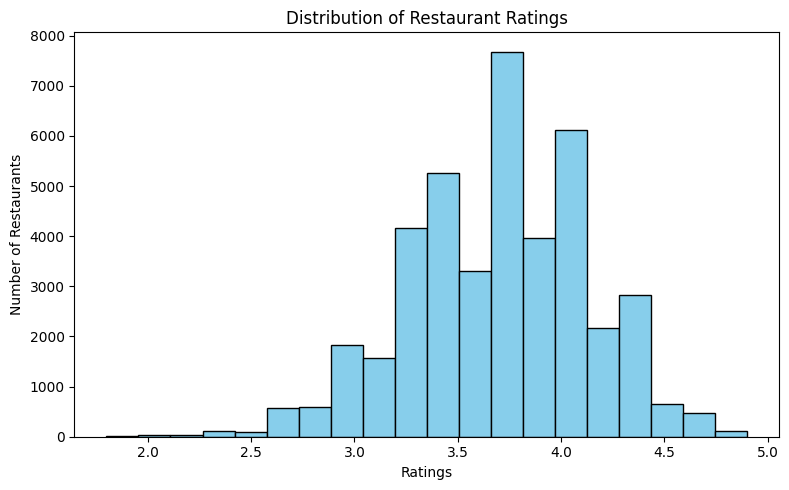

In [ ]:
# Ratings distribution

# Summary stats
print("Rating - Summary Statistics:")
print(df['rate'].describe())

# Histogram of ratings
plt.figure(figsize=(8,5))
plt.hist(df['rate'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Ratings")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.tight_layout()
plt.show()



# **Ratings Distribution**
*Insights*

Based on the summary statistics:






 This shows that most restaurants fall between **3.0 and 4.5 stars**, which indicates that people rate restaurants **realistically** rather than always giving extreme values (like 1 or 5). The ratings are fairly balanced, leaning towards average-to-good experiences.



Step 2: Votes distribution

Votes - Summary Statistics:
 count    41590.000000
mean       351.036523
std        881.103876
min          0.000000
25%         21.000000
50%         73.000000
75%        275.000000
max      16832.000000
Name: votes, dtype: float64


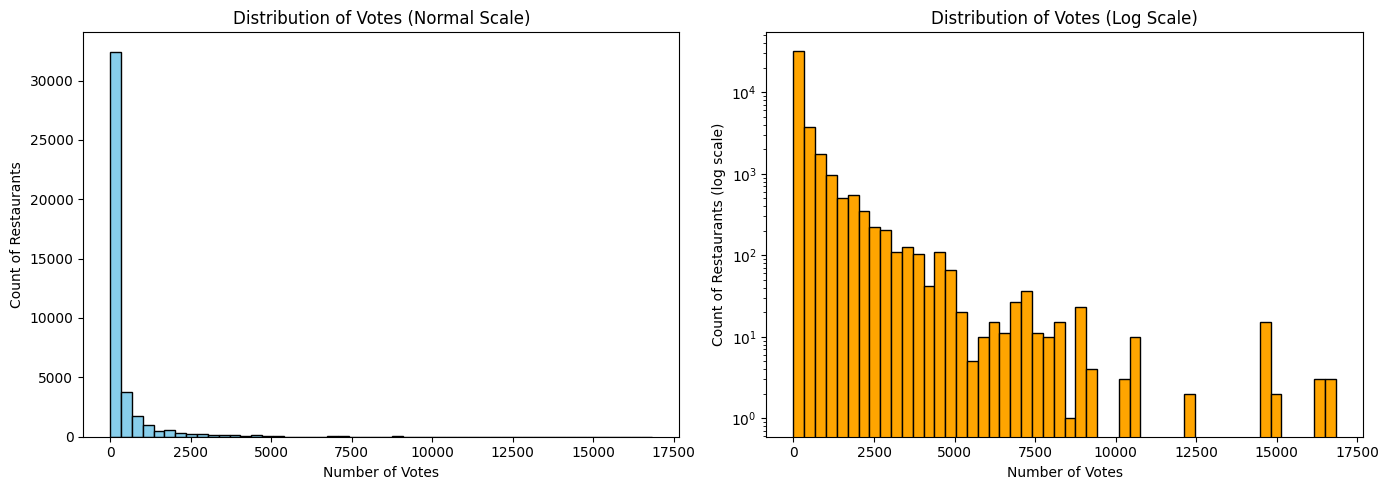

In [ ]:
# Summary statistics for Votes
print("Votes - Summary Statistics:\n", df['votes'].describe())

# Distribution of Votes - Normal vs Log Scale
plt.figure(figsize=(14, 5))

# Normal histogram
plt.subplot(1, 2, 1)
plt.hist(df['votes'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Votes (Normal Scale)")
plt.xlabel("Number of Votes")
plt.ylabel("Count of Restaurants")

# Log-scale histogram
plt.subplot(1, 2, 2)
plt.hist(df['votes'], bins=50, color='orange', edgecolor='black', log=True)
plt.title("Distribution of Votes (Log Scale)")
plt.xlabel("Number of Votes")
plt.ylabel("Count of Restaurants (log scale)")

plt.tight_layout()
plt.show()




 ### Votes Distribution

### Insights
When we look at the histograms, we see that:

Most restaurants don’t get many votes — half of them have fewer than 73.

A few restaurants are extremely popular, with thousands of votes (up to 16,832).

On the normal scale, the chart is dominated by the restaurants with very few votes, so the popular ones almost disappear.

On the log scale, we can clearly see both: the huge number of low-vote restaurants and the very small group of highly popular ones.

In short: Most restaurants on Zomato only receive a small number of customer votes, while just a handful stand out as being very popular and attract massive attention.


Step 3: Cost distribution

Cost - Summary Statistics:
 count    41590.000000
mean       602.293965
std        462.733345
min         40.000000
25%        300.000000
50%        500.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64


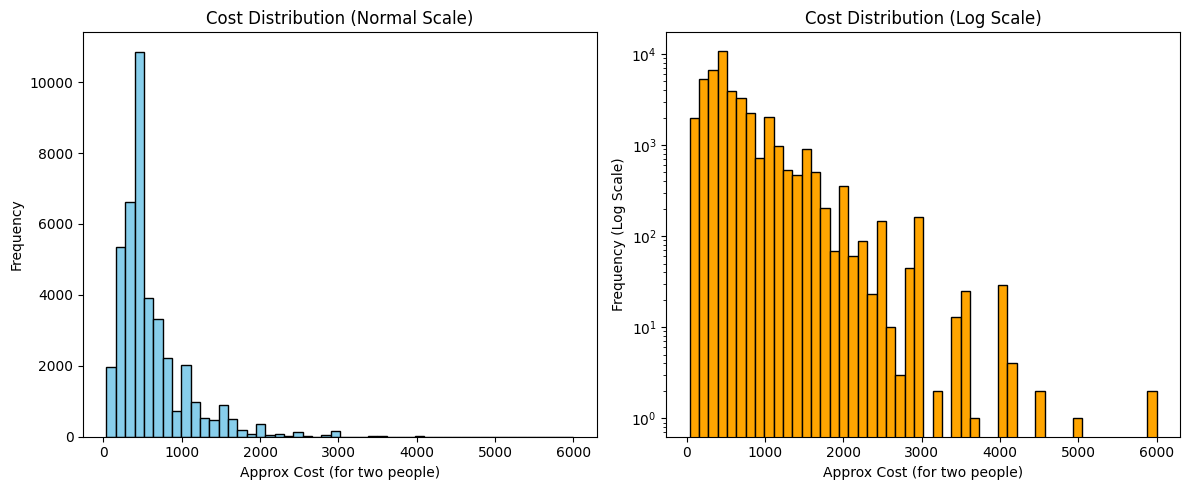

In [ ]:
# Summary statistics for cost
print("Cost - Summary Statistics:\n", df['approx_cost(for two people)'].describe())

# Histogram
plt.figure(figsize=(12,5))

# Normal scale
plt.subplot(1,2,1)
plt.hist(df['approx_cost(for two people)'], bins=50, color='skyblue', edgecolor='black')
plt.title("Cost Distribution (Normal Scale)")
plt.xlabel("Approx Cost (for two people)")
plt.ylabel("Frequency")

# Log scale
plt.subplot(1,2,2)
plt.hist(df['approx_cost(for two people)'], bins=50, color='orange', edgecolor='black', log=True)
plt.title("Cost Distribution (Log Scale)")
plt.xlabel("Approx Cost (for two people)")
plt.ylabel("Frequency (Log Scale)")

plt.tight_layout()
plt.show()


### Cost distribution
### Insights
The normal-scale histogram shows most restaurants cost between 300-500 INR, with fewer above 1000 INR, meaning many are budget-friendly. The log-scale plot confirms this, with lots of cheap options and only a few expensive ones up to 6000 INR, showing Bangalore likes affordable dining with some high-end choices.

Step 4: Online orders


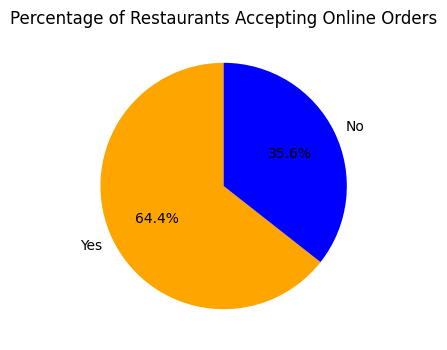

In [ ]:
# Calculate the percentage of restaurants accepting online orders
online_order_counts = df['online_order'].value_counts(normalize=True) * 100
plt.figure(figsize=(4, 4))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Percentage of Restaurants Accepting Online Orders')
plt.show()

### Online Orders
### Insights
 The pie chart shows 64.4% of restaurants accept online orders ("Yes") and 35.6% do not ("No"). For Zomato, this means a majority of their listed restaurants are leveraging online ordering, which is a strong opportunity to boost platform usage and revenue through delivery fees and commissions. The 35.6% without online orders could be a target for Zomato to encourage adoption, potentially by offering incentives, as adding this feature might attract more customers and increase engagement on the app.

Step 5: Book Table

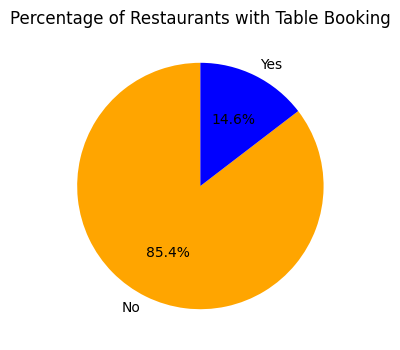

In [ ]:
# Calculate the percentage of restaurants with table booking
book_table_counts = df['book_table'].value_counts(normalize=True) * 100
plt.figure(figsize=(4, 4))
plt.pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Percentage of Restaurants with Table Booking')
plt.show()

# **Book Table**
# *Insights*
The pie chart shows a smaller percentage (14.6%) of restaurants offer table booking, with the rest not providing it. This suggests table booking is less common, possibly limited to upscale or popular places. For Zomato, this could mean a chance to promote booking features to enhance customer convenience and attract more high-end restaurant listings.



*Bivariate analysis*



Step 1: Cost vs Ratings

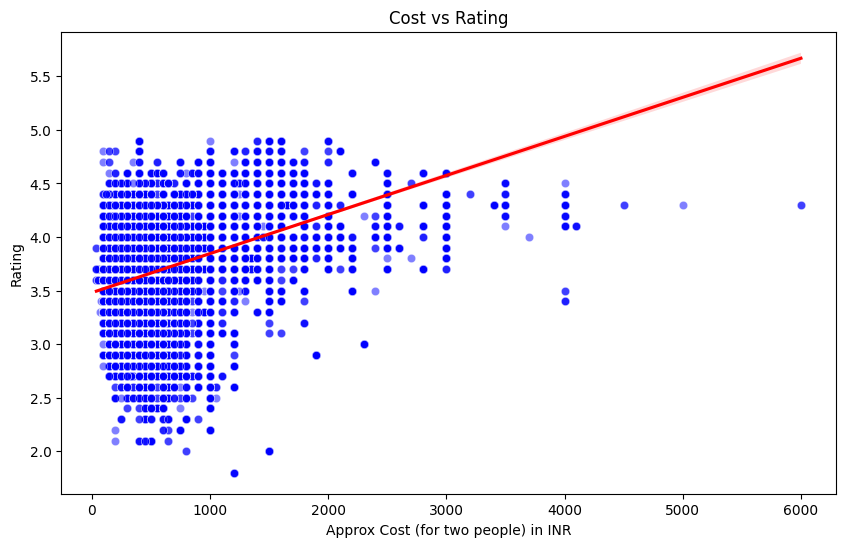

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, alpha=0.5, color='blue')
sns.regplot(x='approx_cost(for two people)', y='rate', data=df, scatter=False, color='red')
plt.title('Cost vs Rating')
plt.xlabel('Approx Cost (for two people) in INR')
plt.ylabel('Rating')
plt.show()

# Cost vs Rating
*Insights*  
The scatter plot of Cost vs Rating reveals that most restaurants in Bangalore are clustered between 0-1000 INR with ratings around (3.5-4.5), indicating a strong presence of affordable, well-rated eateries. The upward-sloping red regression line suggests a weak positive trend—higher costs might slightly improve ratings, but the spread of dots shows this isn’t consistent, as many low-cost restaurants also score highly. For costs above 2000 INR, fewer restaurants appear, with ratings ranging from 3.0 to 5.0, highlighting a niche for premium dining. This suggests Zomato could promote both budget and high-end options, as quality drives ratings across all price ranges.

Step 2: Votes vs Ratings

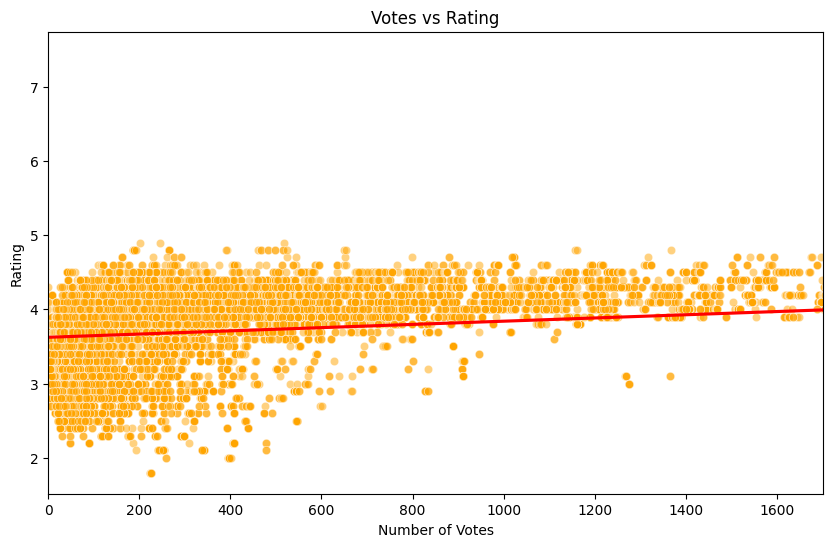

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.5, color='orange')
sns.regplot(x='votes', y='rate', data=df, scatter=False, color='red')
plt.title('Votes vs Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.xlim(0, df['votes'].quantile(0.95))  # Limit x-axis to reduce outlier impact
plt.show()

# Votes vs Ratings
*Insights*
The Votes vs Rating scatter plot shows a dense cluster of restaurants with 0-600 votes and ratings of (3.5-4.5), reflecting a large number of moderately popular, well-rated places. The upward-sloping red regression line indicates a positive trend—restaurants with more votes tend to have higher ratings, likely due to increased visibility and feedback. Beyond 600 votes, fewer restaurants appear, but those with higher votes (up to 1600) often exceed 4.0, suggesting popularity drives better ratings. Zomato can use this to promote engagement on lesser-known restaurants to boost their ratings and visibility.

Step 3: Online order vs Ratings

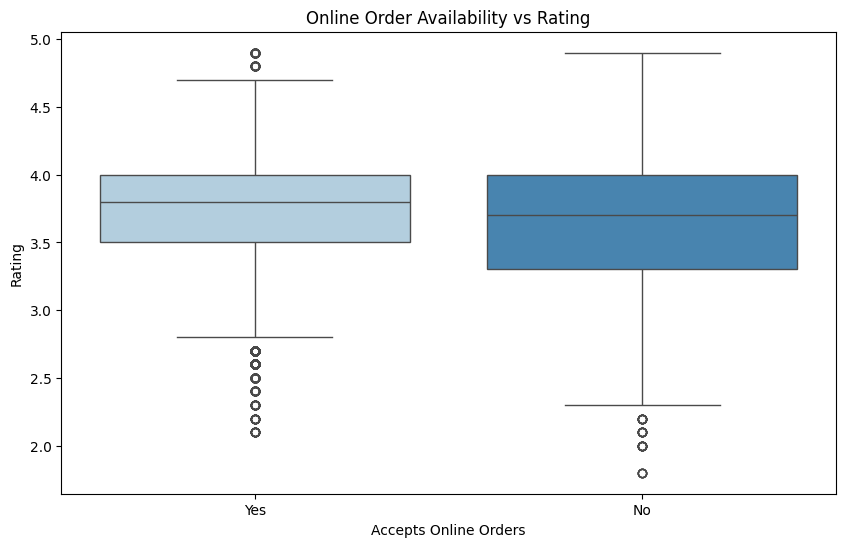

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df, palette='Blues')
plt.title('Online Order Availability vs Rating')
plt.xlabel('Accepts Online Orders')
plt.ylabel('Rating')
plt.show()

# Online order vs Ratings
*Insights*
The box plot for Online Order vs Rating shows that restaurants accepting online orders ("Yes") and those that don’t ("No") have median ratings around 3.5-4.0, suggesting online ordering doesn’t drastically change the average rating. The "Yes" group has a tighter range with fewer low outliers (below 2.5), indicating more consistent ratings, while "No" has more variability and lower outliers. For Zomato, this implies online ordering might stabilize customer satisfaction, offering a chance to promote this feature to improve rating consistency across listings.

Step 4: Book table vs Rating

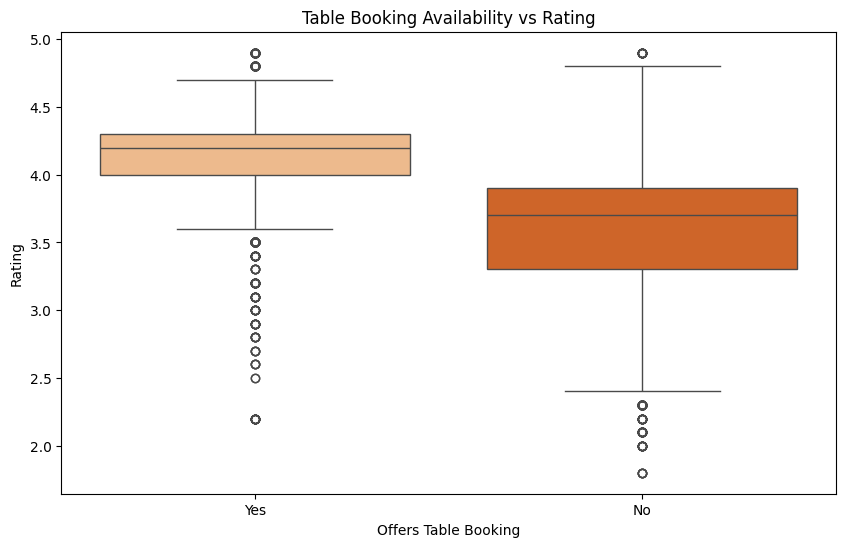

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='rate', data=df, palette='Oranges')
plt.title('Table Booking Availability vs Rating')
plt.xlabel('Offers Table Booking')
plt.ylabel('Rating')
plt.show()

# Book table vs Rating
*Insights*
The Table Booking vs Rating box plot shows that restaurants offering table booking ("Yes") have a median rating around 4.0 with a tighter range, suggesting more consistent high ratings. The "No" group has a lower median (around 3.5-3.8) and more outliers below 2.5, indicating less consistency and more low-rated places. For Zomato, this suggests table booking could be a feature to promote, especially for upscale restaurants, to boost average ratings and attract customers seeking reliable dining experiences.

# **Bivariate Analysis Conclusion**
The bivariate analysis reveals that higher votes and table booking availability show a positive link to better ratings, with votes boosting popularity and booking enhancing consistency. Cost has a weak positive effect on ratings, while online ordering slightly improves rating stability. For Zomato, promoting votes, table booking, and online ordering can enhance restaurant ratings and customer satisfaction in Bangalore.

*Multivariate Analysis*

Step 1: Top cuisines in Bangalore

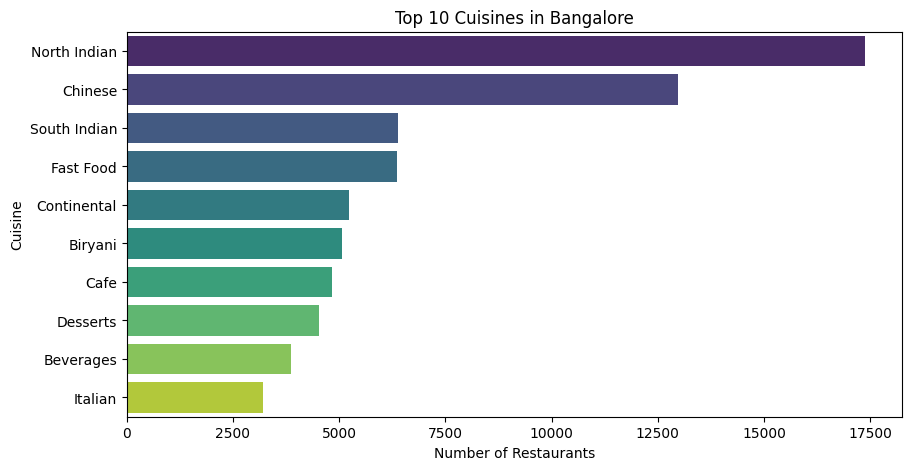

In [ ]:
# Explore cuisines column and count top 10
cuisines = df['cuisines'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=cuisines.values, y=cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# Top cuisines in Bangalore
*Insights*
This bar chart shows the top 10 cuisines in Bangalore by counting restaurants offering each (after splitting the ‘cuisines’ column). The x-axis displays the number of restaurants, and the y-axis lists the cuisines. It helps identify which cuisines are most popular, providing Zomato with insights into market demand.

The chart likely highlights North Indian, Chinese, and South Indian as top cuisines, reflecting Bangalore’s diverse food preferences. Zomato can focus marketing efforts on these popular categories to attract more customers.

Step 2: Top restaurant types

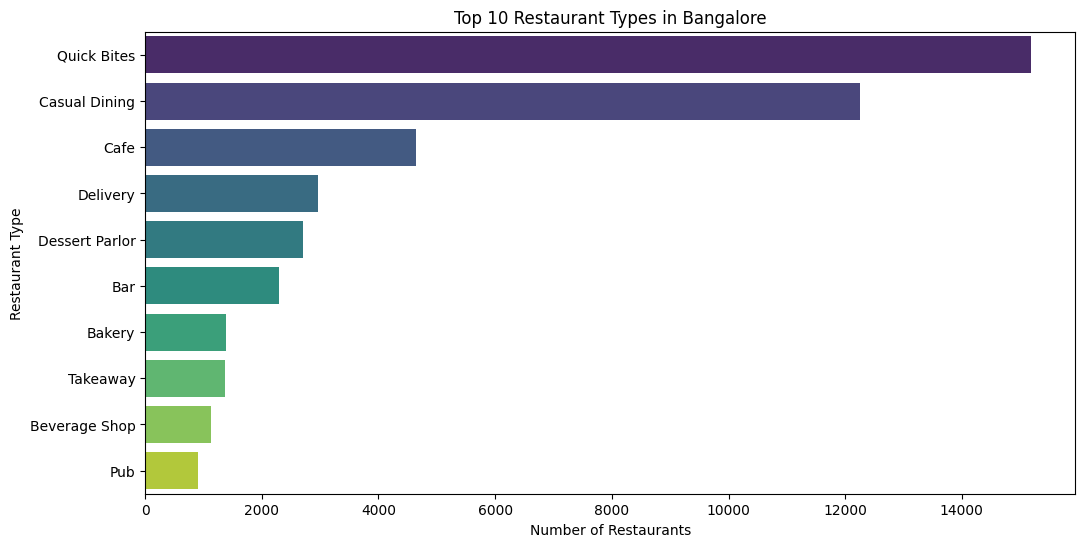

In [ ]:
# Count top 10 restaurant types
rest_types = df['rest_type'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=rest_types.values, y=rest_types.index, palette='viridis')
plt.title('Top 10 Restaurant Types in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

# Top restaurants types
*Insights*
This bar chart lists the top 10 restaurant types by counting occurrences (after splitting the ‘rest_type’ column). The x-axis shows the number of restaurants, and the y-axis lists the types. It reveals the dominant dining styles, aiding Zomato in understanding market segmentation.

The chart shows Casual Dining, Quick Bites, and Cafés leading, indicating a mix of relaxed and fast dining preferences. Zomato can target these types for promotions to cater to varied customer needs.

Step 3: Top locations with most restaurants

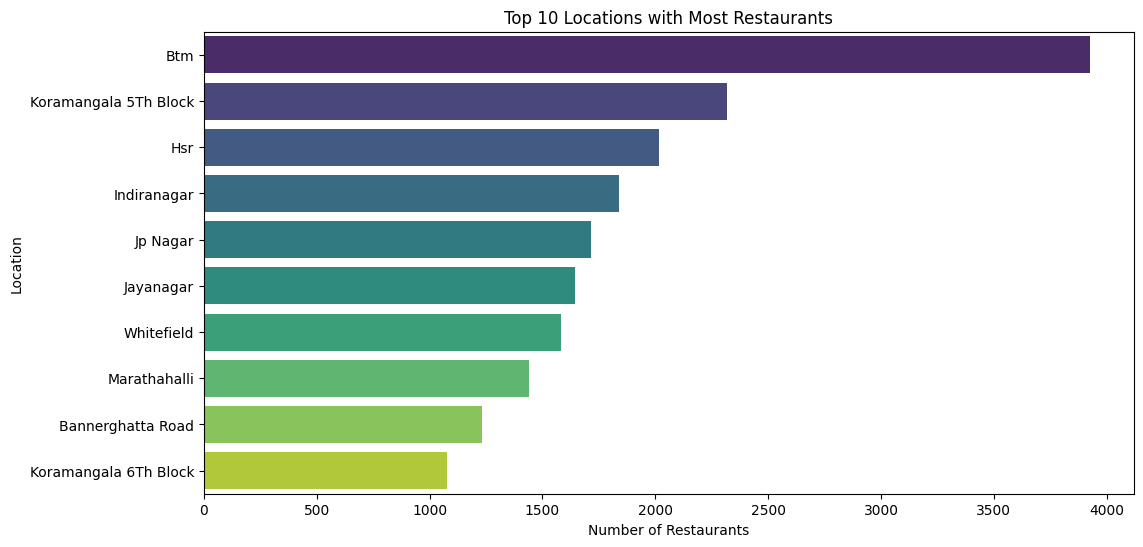

In [ ]:
# Count top 10 locations
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


# Top locations with most restaurants
*Insights*

This bar chart displays the top 10 locations with the most restaurants based on the ‘location’ column. The x-axis shows the count, and the y-axis lists the locations. It highlights hotspots, helping Zomato identify key areas for expansion or marketing.

Locations like BTM, Koramangala, and Hsr dominate, showing urban dining hubs. Zomato can prioritize these areas for new restaurant listings or delivery optimization.

Step 4: Average Rating per Cuisine → Which cuisines are loved most?

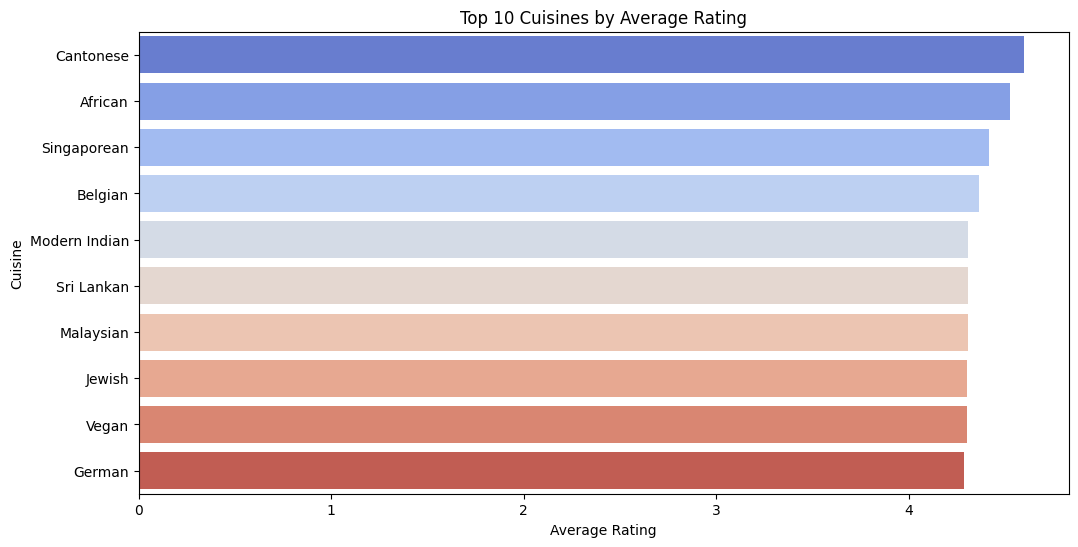

In [ ]:
# Explode cuisines and calculate average rating
exploded_cuisines = df.assign(cuisines=df['cuisines'].str.split(', ')).explode('cuisines')
avg_rating_cuisine = exploded_cuisines.groupby('cuisines')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

#Average Rating per Cuisine → Which cuisines are loved most?
*Insights*

This bar chart shows the top 10 cuisines by average rating, calculated by grouping the exploded ‘cuisines’ column and averaging ‘rate’. The x-axis displays the average rating, and the y-axis lists the cuisines. It identifies which cuisines customers rate highest, offering quality insights.

Cuisines like Cantonese and African top the list, indicating premium and loved options. Zomato can highlight these for customers seeking high-quality dining experiences.

Step 5: Average Cost per Cuisine → Which cuisines are expensive vs budget-friendly?

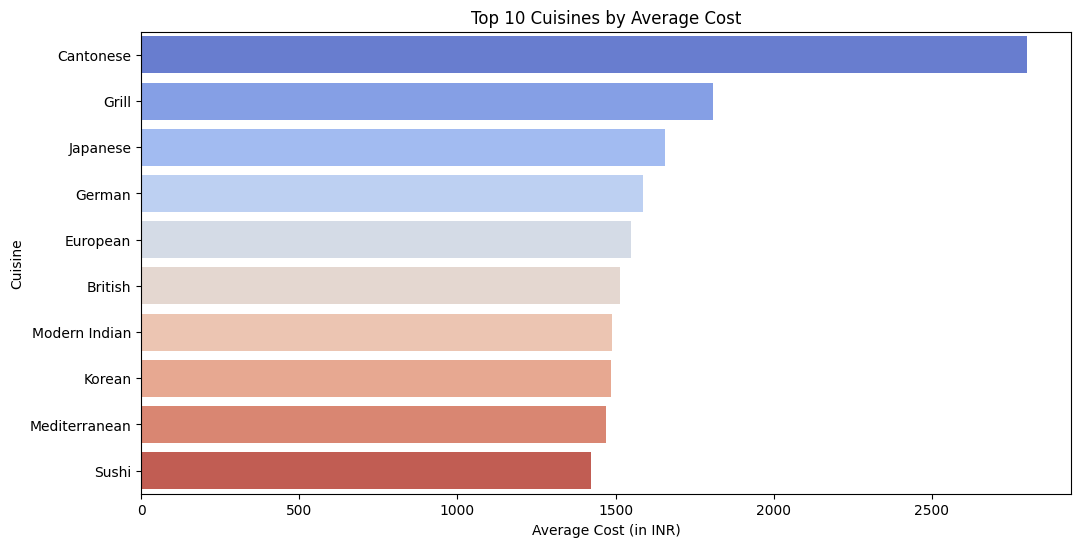

In [ ]:
# Calculate average cost per cuisine
avg_cost_cuisine = exploded_cuisines.groupby('cuisines')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_cuisine.values, y=avg_cost_cuisine.index, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Cost')
plt.xlabel('Average Cost (in INR)')
plt.ylabel('Cuisine')
plt.show()

#Average Cost per Cuisine → Which cuisines are expensive vs budget-friendly?
*Insights*

This bar chart displays the top 10 cuisines by average cost, grouping the exploded ‘cuisines’ column and averaging ‘approx_cost(for two people)’. The x-axis shows the cost in INR, and the y-axis lists the cuisines. It helps distinguish expensive versus budget-friendly options.

Cuisines like Cantonese and Grill are pricier, while Sushi and Mediterranean are budget-friendly. Zomato can use this to recommend cost-effective or premium dining based on customer budgets.

# **Overall Multivariate Analysis Insights**

The Multivariate/Category Analysis highlights Bangalore’s dining landscape: North Indian, Chinese, and South Indian dominate as top cuisines, reflecting diverse tastes; Casual Dining, Quick Bites, and Cafés lead restaurant types, showing varied dining preferences; BTM, Koramangala, and Hsr emerge as key locations, indicating urban hotspots. Average ratings favor Cantonese and African cuisines, suggesting quality appeal, while Cantonese and Grill top average costs (over 2000 INR), with Sushi being more affordable. Zomato can leverage these insights to target popular cuisines and locations, promote high-rated premium options, and balance offerings across price ranges to maximize market reach.Cantonese cuisine leads in both average rating and cost (over 2000 INR), marking it as a premium, high-quality option in Bangalore. Zomato can leverage this to target affluent customers and boost platform prestige by promoting top-rated Cantonese restaurants.

*Correlation Heatmap (Votes, Ratings, Cost)*

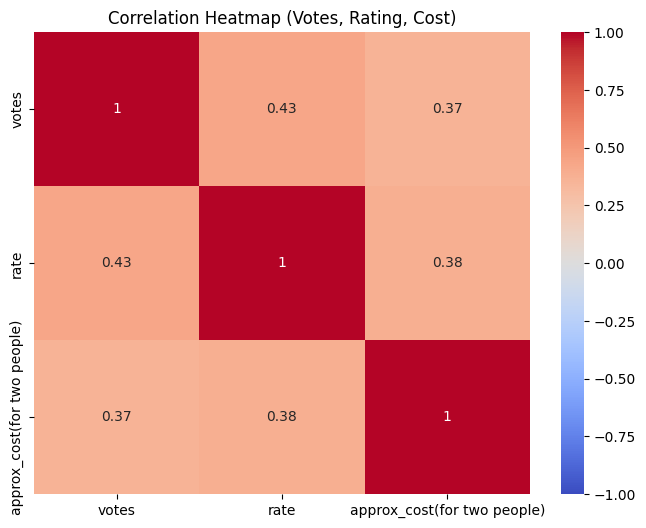

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns and calculate correlation matrix
corr_matrix = df[['votes', 'rate', 'approx_cost(for two people)']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Votes, Rating, Cost)')
plt.show()

# Correlation Heatmap
*Insights*



The correlation heatmap shows a moderate positive link (0.43) between votes and rating, suggesting popularity boosts ratings. Weaker positive correlations (0.37-0.38) between votes-cost and rate-cost indicate higher costs slightly align with more votes and better ratings, but the effect is limited. The blocks with a correlation of 1.0 along the diagonal (votes vs votes, rate vs rate, cost vs cost) represent each variable’s perfect correlation with itself, which is expected and confirms data consistency. For Zomato, this highlights that encouraging customer votes is key to improving ratings, while cost’s impact is less significant, guiding a focus on engagement over pricing strategies.

# Insights If variables are strongly or weakly correlated
The correlation heatmap reveals a moderate positive correlation (0.43) between votes and rating, indicating a noticeable but not overwhelming link where more votes tend to boost ratings. The correlations between votes and cost (0.37) and rate and cost (0.38) are weak to moderate, suggesting a slight tendency for higher costs to align with more votes or better ratings, but the effect is limited. The diagonal 1.0 values confirm each variable’s perfect self-correlation. For Zomato, this means focusing on increasing votes offers a moderately effective way to improve ratings, while cost’s weak influence suggests it’s less critical to rating success.